In [7]:
using Qwind, PyPlot, Glob, YAML
plt.style.use("science")
mnras_width = 252/72.27

3.4869240348692405

In [13]:
models = sort(glob("./results/rin_scan/model*"));
rins = []
properties = []
for model in models
    push!(rins, YAML.load_file(model * "/config.yaml")["initial_conditions"]["r_in"])
    last_iter = sort(glob(model * "/iteration*"))[end]
    push!(properties, YAML.load_file(last_iter * "/wind_properties.yaml"))
end

In [15]:
properties[1]

Dict{Any, Any} with 7 entries:
  "eddington_luminosity"  => 1.25707e46
  "bolometric_luminosity" => 6.28533e45
  "mass_accretion_rate"   => 1.22281e26
  "kinetic_luminosity"    => 8.92965e44
  "mass_loss_fraction"    => 0.37628
  "mass_loss"             => 4.60119e25
  "max_velocity"          => 0.353053

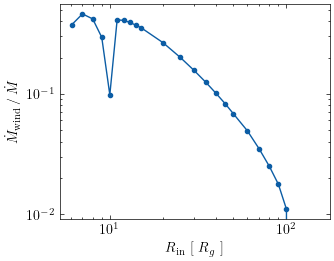

PyObject Text(21.198090304803166, 0.5, '$\\dot M_\\mathrm{wind}\\, / \\,\\dot M$')

In [39]:
fig, ax = plt.subplots(figsize=(mnras_width, 0.8mnras_width))
mdots = [property["mass_loss_fraction"] for property in properties]
ax.plot(rins, mdots, "o-", markersize=3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(L"$R_\mathrm{in}$ [ $R_g$ ]")
ax.set_ylabel(L"$\dot M_\mathrm{wind}\, / \,\dot M$")

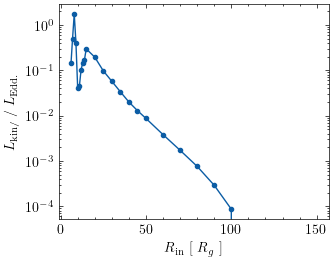

PyObject Text(20.297595834738658, 0.5, '$L_\\mathrm{kin/} \\; / \\; L_\\mathrm{Edd.}$')

┌ Warning: /home/arnau/code/Qwind.jl/src/radiative_transfer/density_interpolators is not an existing directory, Revise is not watching
└ @ Revise /home/arnau/.julia/packages/Revise/mvD4N/src/packagedef.jl:565


In [40]:
fig, ax = plt.subplots(figsize=(mnras_width, 0.8mnras_width))
mdots = [property["kinetic_luminosity"] / property["bolometric_luminosity"] for property in properties]
ax.plot(rins, mdots, "o-", markersize=3)
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(L"$R_\mathrm{in}$ [ $R_g$ ]")
ax.set_ylabel(L"$L_\mathrm{kin/} \; / \; L_\mathrm{Edd.}$")